In [37]:
# 게임이론 최적화 알고리즘 

import random
import numpy as np


class Based_on_play_theory_optimizer():

    def __make_strategy(self, number_of_player=10,strategy_range=[-20,20],number_of_strategy=20,resolution=1):
        """
        주어진 player의 수, strategy의 영역, strategy의 개수에 의해 
        전체 pure strategy와 mixed strategy를 생성한다.
        [[[pure,mixed]... ~ number_of_strategy]... ~ number_of_player ]
        .shape = (number_of_player,number_of_strategy,2 (pure,mixed))
        """
        def non_duplicate_randrange(l,h,r,c):
            #lst = np.asarray([[random.randrange(l*1/r,h*1/r) * r,1/c] for i in range(c)])
            #while (not len(lst[:,0]) == len(set(lst[:,0]))):
            #    lst = np.asarray([[random.randrange(l*1/r,h*1/r) * r,1/c] for i in range(c)])
            #return lst    
            t = np.ones((c,2))
            x = np.linspace(l, h, c)
            t[:,0] = x[:]
            t[:,1] = 1/c    
            return t    

        S = [non_duplicate_randrange(strategy_range[0],strategy_range[1],resolution,number_of_strategy) for x in range(number_of_player)]
        return np.asarray(S, dtype=np.float64)

    def __choice_strategies(self, strategy_matrix):
        """
        S에서 player들에 대한 전략을 선택 한다.
        선택은 mixed strategy의 확율에 의해..
        """
        return np.asarray([random.choices(population=strategy_matrix[i,:,0],weights=strategy_matrix[i,:,1],k=1) for i in range(strategy_matrix.shape[0])]).reshape(strategy_matrix.shape[0])

    
    def __make_Y_sample(self, strategy_matrix,player=0,p_strategy=0,sample_count = 10):
        """
        player 0의 pure strategy에 대한 (si,Y-i(t)) 생성, 표본 개수 10개
        """
        Y_sample = np.asarray([self.__choice_strategies(strategy_matrix) for i in range(sample_count)])
        Y_sample[:,player] = strategy_matrix[player,p_strategy,0]
        return Y_sample

    def __u_si_Y_i(self, test_function=None,sample_strategies = None):
        """
        (si,Y-i(t))에서 playe 0의 각 pure_strategy에 대한 sample의 f1 평균값 계산 
        """
        y_m = np.asarray([np.mean([test_function(sample_strategies[j,i,:]) for i in range(sample_strategies.shape[1])]) for j in range(sample_strategies.shape[0])])
        return y_m

    def optimize(self,
                 object_function=None,
                 player_count=10,
                 strategy_range=[-20,20],
                 number_of_strategies = 20,
                 sample_count = 10,
                 epoch = 100,
                 resolution=1):
        
        strategy_matrix = self.__make_strategy(player_count,strategy_range,number_of_strategies,resolution)
        history = []
        for t in range(1,epoch+1):
            #Sample strategy 추출
            si_Y_i = np.asarray([[self.__make_Y_sample(strategy_matrix,player=j,p_strategy=i,sample_count = sample_count) for i in range(strategy_matrix.shape[1])] for j in range(strategy_matrix.shape[0])])
            #시행에 대한 best response 추출
            br = np.asarray([strategy_matrix[i,self.__u_si_Y_i(test_function=object_function,sample_strategies = si_Y_i[i,:,:,:]).argmin(),0] for i in range(strategy_matrix.shape[0])])
            #mixed strategy의 갱신
            for i in range(strategy_matrix.shape[0]):
                strategy_matrix[i,:,1] = strategy_matrix[i,:,1]+(1/(t+1))*(((strategy_matrix[i,:,0]==br[i]) * 1) - strategy_matrix[i,:,1])
            #다음 strategy 추출
            s = self.__choice_strategies(strategy_matrix)
            # 목적함수의 값 산출
            mv = object_function(s)
            print("\r{}/{} object_function({})={}               ".format(t,epoch,s,mv), end="", flush=True)
            history.append(mv)
        return s,history    


1/100 object_function([-17.89473684 -20.         -20.           7.36842105  -7.36842105
2/100 object_function([-13.68421053  -9.47368421  11.57894737   1.05263158  -1.05263158              
3/100 object_function([-13.68421053 -20.           9.47368421 -17.89473684 -15.78947368               
4/100 object_function([-17.89473684 -20.         -20.           7.36842105 -17.89473684              
5/100 object_function([-11.57894737   7.36842105 -20.         -17.89473684 -20.20594863               
6/100 object_function([-17.89473684 -20.           1.05263158 -20.         -15.78947368               
7/100 object_function([-13.68421053 -20.         -20.         -17.89473684 -15.78947368               
8/100 object_function([-20.         -20.         -20.         -17.89473684 -20.48075385               
9/100 object_function([-17.89473684 -20.         -20.           7.36842105 -15.78947368               
10/100 object_function([-13.68421053 -20.           7.36842105 -20.         -20.7293865   

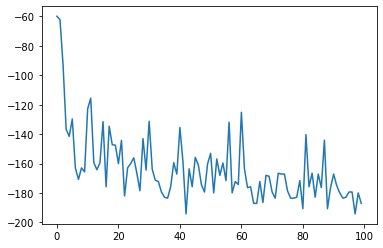

In [38]:
# 실험1
import matplotlib.pyplot as plt
# 논문에서 f1에 해당하는 함수
def f1(player_strategies):
    y = - np.sum(player_strategies* np.sin(np.lib.scimath.sqrt(np.abs(player_strategies))))
    return y

play_optimizer = Based_on_play_theory_optimizer()

s,history = play_optimizer.optimize(object_function=f1,player_count=10,strategy_range=[-20,20],number_of_strategies=20,sample_count=10,epoch=100,resolution=1)

plt.plot(history)
plt.show()


<IPython.core.display.Javascript object>


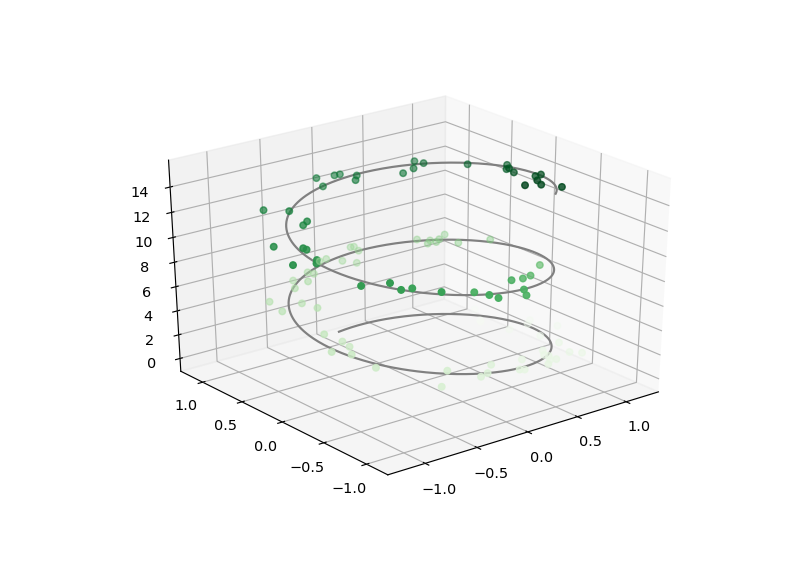

In [3]:
from mpl_toolkits import mplot3d
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

plt.show()

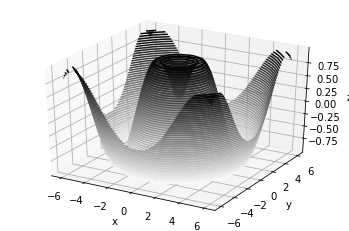

In [15]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [34]:
t = np.ones((30,2))
x = np.linspace(-6, 6, 30)
t[:,0] = x[:]
t[:,1] = 1/30
t

array([[-6.        ,  0.03333333],
       [-5.5862069 ,  0.03333333],
       [-5.17241379,  0.03333333],
       [-4.75862069,  0.03333333],
       [-4.34482759,  0.03333333],
       [-3.93103448,  0.03333333],
       [-3.51724138,  0.03333333],
       [-3.10344828,  0.03333333],
       [-2.68965517,  0.03333333],
       [-2.27586207,  0.03333333],
       [-1.86206897,  0.03333333],
       [-1.44827586,  0.03333333],
       [-1.03448276,  0.03333333],
       [-0.62068966,  0.03333333],
       [-0.20689655,  0.03333333],
       [ 0.20689655,  0.03333333],
       [ 0.62068966,  0.03333333],
       [ 1.03448276,  0.03333333],
       [ 1.44827586,  0.03333333],
       [ 1.86206897,  0.03333333],
       [ 2.27586207,  0.03333333],
       [ 2.68965517,  0.03333333],
       [ 3.10344828,  0.03333333],
       [ 3.51724138,  0.03333333],
       [ 3.93103448,  0.03333333],
       [ 4.34482759,  0.03333333],
       [ 4.75862069,  0.03333333],
       [ 5.17241379,  0.03333333],
       [ 5.5862069 ,

In [18]:
# 여기서 global minimum은 circle 형태로 다수 존재
# local minimum은 -1,1 사이에서 , 0,0  한개 존재
# strategy의 range에 따라 해당 목적함수에서 local 또는 global minimum에 수렴 가능 할 것 ?

#1 먼저 목적함수의 재정의

def f(player_strategies):
    return np.sin(np.sqrt(np.sum(player_strategies ** 2)))

player_strategies = [np.linspace(-6, 6, 30),np.linspace(-6, 6, 30)]
player_strategies = np.meshgrid(player_strategies)
Z = f(player_strategies)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(player_strategies[0], player_strategies[1], Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'